In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\prudi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


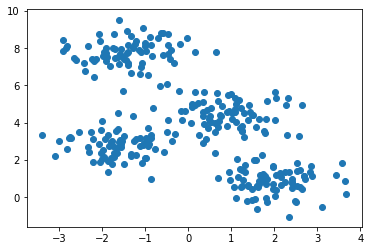

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [3]:
## Sample Data
X[0:10]

array([[ 0.63378839,  2.34280866],
       [-1.44122515,  7.33865044],
       [ 1.1850368 ,  5.23225746],
       [-0.98034307,  7.81149042],
       [ 1.14069873,  2.05835514],
       [ 3.66800921,  0.15565258],
       [-1.85510894,  1.37687336],
       [ 1.48663347,  4.39407536],
       [-0.0310449 ,  8.53153609],
       [-0.62157358,  8.79793486]])

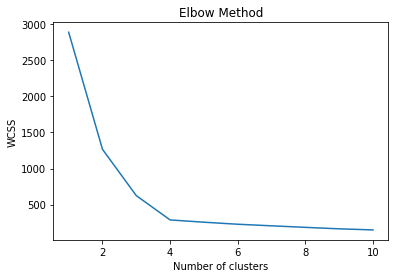

In [10]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_=Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

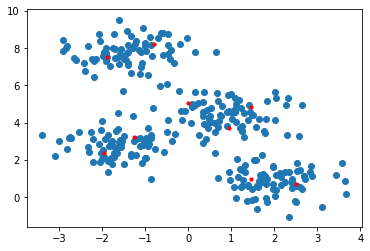

In [16]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=30, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10 ,c='red')
plt.show()

In [15]:
# importing dependencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 

In [16]:
# creating data 
mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100) 
   
mean_02 = np.array([6.0, 7.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100) 
   
mean_03 = np.array([7.0, -5.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100) 
   
mean_04 = np.array([2.0, -7.0]) 
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100) 
   
data = np.vstack((dist_01, dist_02, dist_03, dist_04)) 
np.random.shuffle(data) 

In [22]:
## Sample Data
data[0:10]

array([[ 2.9733708 , -5.5736837 ],
       [ 7.21186248,  6.56889054],
       [ 7.26391599, -5.99138771],
       [ 6.44957235, -5.3152793 ],
       [ 0.10207289,  0.91177491],
       [ 0.09379556, -0.1406145 ],
       [ 4.17323878, -7.97228537],
       [ 6.35376401,  8.51102496],
       [ 5.88539782,  7.60293821],
       [ 1.83505283, -8.23791718]])

In [17]:
# function to plot the selected centroids 
def plot(data, centroids): 
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
      
    plt.legend() 
    plt.xlim(-5, 12) 
    plt.ylim(-10, 15) 
    plt.show() 

In [18]:
# function to compute euclidean distance 
def distance(p1, p2): 
    return np.sum((p1 - p2)**2) 

In [19]:
def initialize(data, k): 
    ''' 
    intialized the centroids for K-means++ 
    inputs: 
        data - numpy array of data points having shape (200, 2) 
        k - number of clusters  
    '''
    ## initialize the centroids list and add 
    ## a randomly selected data point to the list 
    centroids = [] 
    centroids.append(data[np.random.randint( 
            data.shape[0]), :]) 
    plot(data, np.array(centroids)) 
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
        plot(data, np.array(centroids)) 
    return centroids 
   

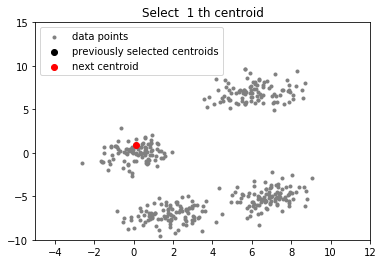

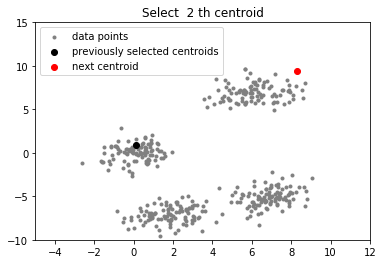

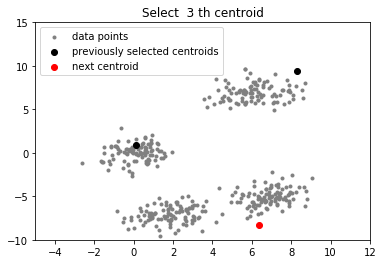

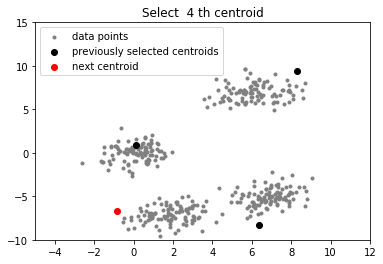

In [20]:
# call the initialize function to get the centroids 
centroids = initialize(data, k = 4) 